# Q6

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import convolve2d
import time

# Part 1 and Part 2

In [4]:
f = cv2.imread('../input_data/rectangle.jpg', 0).astype('float64')
h = cv2.imread('../input_data/bricks.jpg', 0).astype('float64')

mf, nf = f.shape
mh, nh = h.shape

f_pad = np.zeros((mh+mf-1, nh+nf-1))
f_pad[0:mf, 0:nf] = f
h_pad = np.zeros((mf+mh-1, nh+nf-1))
h_pad[0:mh, 0:nh] = h

s1 = time.time()
F = np.fft.fft2(f_pad)
H = np.fft.fft2(h_pad)
ff = np.multiply(F,H)
e1 = time.time()

s2 = time.time()
conv_fh = convolve2d(f,h, mode='full')
ff_conv = np.fft.fft2(conv_fh)
e2 = time.time()

Time taken for DFT:  0.03595232963562012
Time taken for convolution:  110.15479326248169
Error=  1.555761793126801e-06


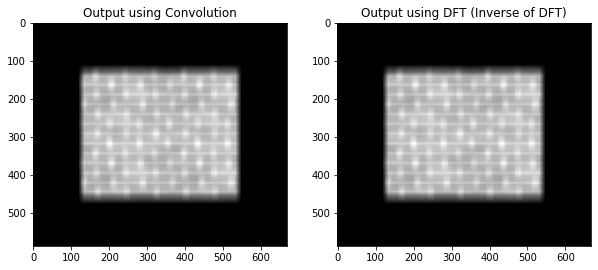

In [5]:
iff = np.fft.ifft2(ff)

print("Time taken for DFT: ", e1-s1)
print("Time taken for convolution: ", e2-s2)
# iff_conv = np.fft.ifftshift(np.fft.ifft2(ff_conv))

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(abs(iff), cmap='gray')
plt.title("Output using Convolution")
plt.subplot(122)
plt.imshow(conv_fh, cmap='gray')
plt.title('Output using DFT (Inverse of DFT)')


error = np.sum(abs(ff_conv - ff)) / (conv_fh.shape[0] * conv_fh.shape[1])
print("Error= ",error)




In [7]:
f = cv2.imread('../input_data/lena.jpg', 0).astype('float64')
h = cv2.imread('../input_data/bricks.jpg', 0).astype('float64')

mf, nf = f.shape
mh, nh = h.shape

f_pad = np.zeros((mh+mf-1, nh+nf-1))
f_pad[0:mf, 0:nf] = f
h_pad = np.zeros((mf+mh-1, nh+nf-1))
h_pad[0:mh, 0:nh] = h

s1 = time.time()
F = np.fft.fft2(f_pad)
H = np.fft.fft2(h_pad)
ff = np.multiply(F,H)
e1 = time.time()

s2 = time.time()
conv_fh = convolve2d(f,h, mode='full')
ff_conv = np.fft.fft2(conv_fh)
e2 = time.time()

Time taken for DFT:  0.045426130294799805
Time taken for convolution:  242.76961660385132
Error=  7.46500263379922e-05


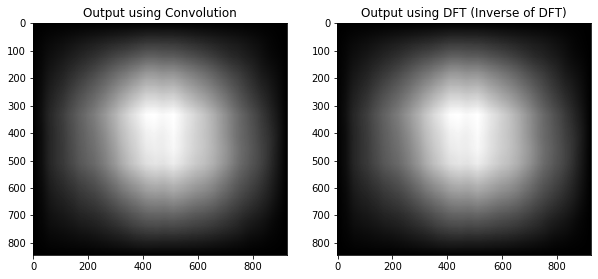

In [8]:
iff = np.fft.ifft2(ff)

print("Time taken for DFT: ", e1-s1)
print("Time taken for convolution: ", e2-s2)
# iff_conv = np.fft.ifftshift(np.fft.ifft2(ff_conv))

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(abs(iff), cmap='gray')
plt.title("Output using Convolution")
plt.subplot(122)
plt.imshow(conv_fh, cmap='gray')
plt.title('Output using DFT (Inverse of DFT)')


error = np.sum(abs(ff_conv - ff)) / (conv_fh.shape[0] * conv_fh.shape[1])
print("Error= ",error)




The time taken by both the methods (DFT and Convolution) increases with sizes of f and h. Convolution is fast for really small images whereas DFT is faster even for large images. Hence DFT is better in terms of time taken for computation.